

<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## PGE 383 Graduate Student Project Template 

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
____________________



## Advanced Machine Learning Techniques for Predictive Modeling in Oil Production: Support Vector Regression, Random Forest, and CatBoost Analysis

#### Nadia Mouedden, Ph. D. Student
#### Petroleum and Geosystems Engineering, Cockrell School of Engineering

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences




_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Misael Morales, Graduate Student, The University of Texas at Austin
##### [LinkedIn](https://www.linkedin.com/in/misaelmmorales/)


### Executive Summary

* Assessed the resilience of SVR, Random Forest, and CatBoost models against data with variable noise and non-linearity.

* Found CatBoost to surpass others in handling complex datasets.

* Recommend CatBoost for its robust predictive capabilities in diverse conditions.

### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

### Functions

In [2]:
def modify_data(X, nonlinearity_level, noise_level):
    # This is a placeholder function.
    # Adding Gaussian noise and a non-linear transformation.
    X_modified = X.copy()
    # Add noise
    noise = noise_level * np.random.randn(*X.shape)
    X_modified += noise
    # Add non-linearity
    X_modified = np.power(X_modified, nonlinearity_level)
    return X_modified

### Robust modeling workflow: Noise and Nonlinearity Integration

In this workflow, we improve the robustness of machine learning models such as SVR, Random Forest, and CatBoost by incorporating random noise and non-linearity into our data. Key steps include

1. Loading and visualizing the data.

2. Implementing SVR, Random Forest, and CatBoost for prediction.

3. Tuning the hyperparameters of each model.

4. Evaluate model performance.

5. Comparing model effectiveness across different data complexity scenarios.

### Load Data

The following workflow applies the .csv file 'unconv_MV_v5.csv', a synthetic dataset. 

We will work with the following features:

* **porosity** - fraction of rock void in units of percentage
* **brittleness** - ability of a rock to fracture in units of percentage

In [3]:
df =pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV.csv") # load the comma delimited data file from Dr. Pyrcz's GeoDataSets GitHub repository

#### Introducing Noise and Non-linearity

We modify features by adding random noise and non-linearity to evaluate model resilience and tuning efficiency under varied data conditions.


In [4]:
# Select features and target
X = df[['Por', 'Brittle']]
y = df['Production']

# Introduce non-linearities and noise to the 'Production' variable
np.random.seed(42)  # For reproducibility
noise = np.random.normal(0, np.std(y) * 0.1, size=y.shape)  # Adjust the noise level to 10% of the Production std dev

# Enhanced Non-linear Effect
complex_non_linear_effect = (np.sin(5 * X['Por']) + np.sin(5 * X['Brittle']) + 
                             X['Por']**2 + np.log(1 + abs(X['Brittle'])) + 
                             np.cos(X['Por'] * X['Brittle']))

# Scale the complex non-linear effect to be significant
y_noisy_nonlinear = y + complex_non_linear_effect * np.std(y) * 0.5 + noise

#### Standrization of the predictor features

To ensure scale uniformity across predictor features, we apply standardization. This step not only improves model performance by balancing the influence of features, but also allows for faster convergence in optimization algorithms.

In [5]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Visualization of the data

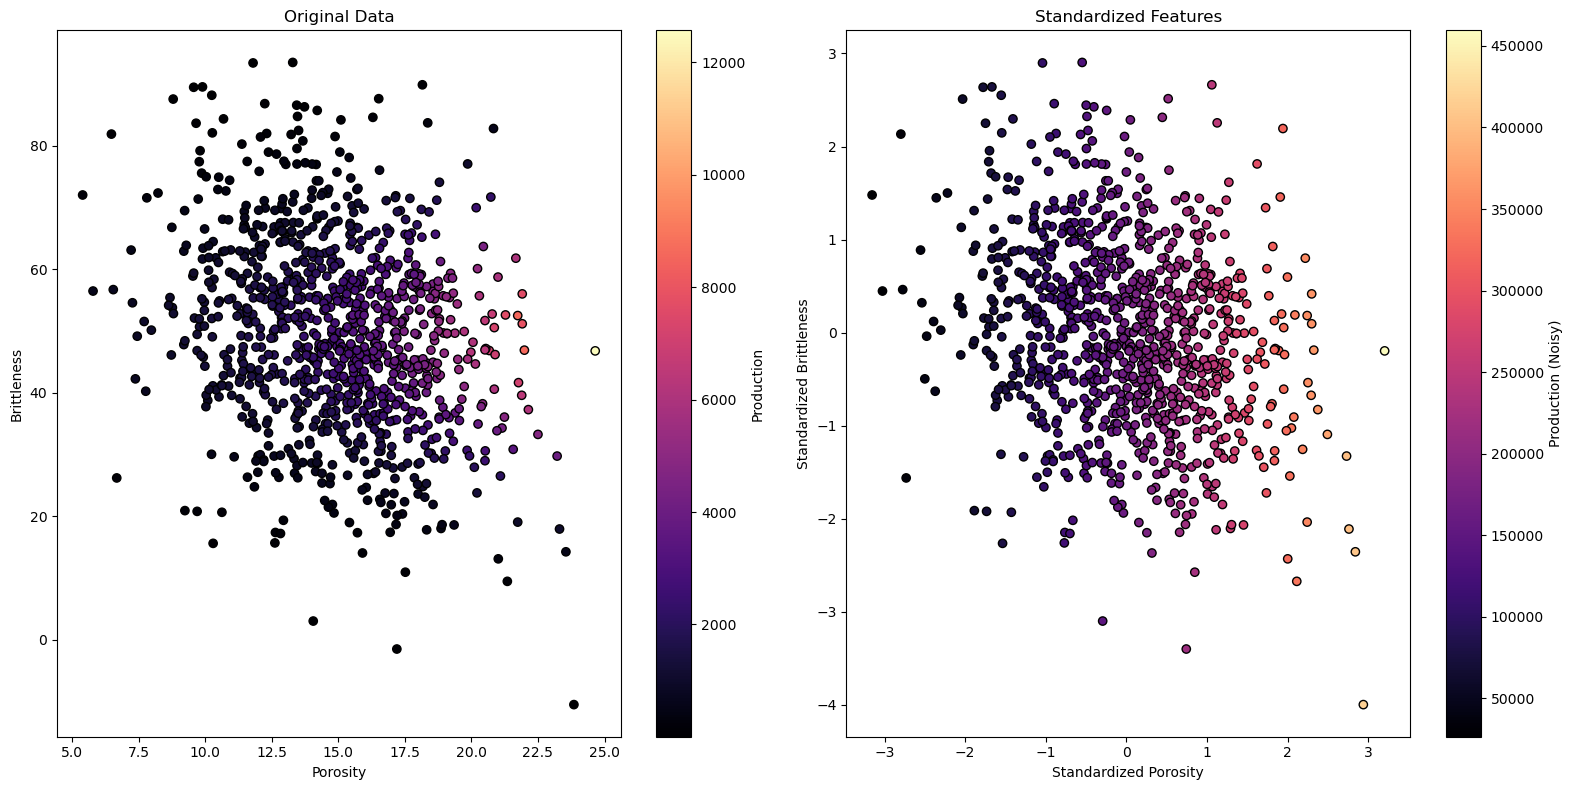

In [6]:
# Plot the original, noisy, non-linear, and standardized data
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Original Data
axs[0].scatter(X['Por'], X['Brittle'], c=y, cmap='magma', edgecolor='k')
axs[0].set_title('Original Data')
axs[0].set_xlabel('Porosity')
axs[0].set_ylabel('Brittleness')
fig.colorbar(axs[0].collections[0], ax=axs[0], label='Production')


# Standardized Features with Noisy, Non-Linear Production
axs[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_noisy_nonlinear, cmap='magma', edgecolor='k')
axs[1].set_title('Standardized Features')
axs[1].set_xlabel('Standardized Porosity')
axs[1].set_ylabel('Standardized Brittleness')
fig.colorbar(axs[1].collections[0], ax=axs[1], label='Production (Noisy)')

plt.tight_layout()
plt.show()

In [7]:
original_data_df = pd.DataFrame({
    'Por': df['Por'],  
    'Brittle': df['Brittle'], 
    'Prod': df['Production'] 
})

# Summary Statistics for Original Data with Noise and Non-Linearity
print("Summary Statistics for Original Data:")
print(original_data_df.describe())


Summary Statistics for Original Data:
               Por      Brittle          Prod
count  1000.000000  1000.000000   1000.000000
mean     14.950460    49.719480   2247.295809
std       3.029634    15.077006   1464.256312
min       5.400000   -10.500000      2.713535
25%      12.857500    39.722500   1191.369560
50%      14.985000    49.680000   1976.487820
75%      17.080000    59.170000   3023.594214
max      24.650000    93.470000  12568.644130


In [8]:
# Create a DataFrame for standardized features
standardized_df = pd.DataFrame(X_scaled, columns=['Standardized Por', 'Standardized Brittle'])

# Add the noisy, non-linear production data to the DataFrame
standardized_df['Noisy Non-Linear Prod'] = y_noisy_nonlinear

# Summary Statistics for Standardized Data with Noise and Non-Linearity
print("Summary Statistics for standardized Data with Noise and Non-Linearity:")
standardized_df.describe()

Summary Statistics for standardized Data with Noise and Non-Linearity:


,Standardized Por,Standardized Brittle,Noisy Non-Linear Prod
count,1.000000e+03,1.000000e+03,1000.000000
mean,1.332268e-16,1.927347e-16,175404.047694
std,1.000500e+00,1.000500e+00,67749.506435
min,-3.153925e+00,-3.996126e+00,26554.954300
25%,-6.911749e-01,-6.633931e-01,126215.876493
50%,1.140642e-02,-2.619867e-03,168959.837995
75%,7.032550e-01,6.271304e-01,218119.761303
max,3.203157e+00,2.903256e+00,459520.181913


### 1. Support Vector Regression Model


SVR, an extension of the Support Vector Machine (SVM) algorithm, is used for regression problems. It predicts an output by fitting a hyperplane in a high-dimensional space where data points are mapped via a kernel function.

**Key Aspects of SVR:**
- **Prediction:** Based on the decision boundary, SVR predicts values within a margin of tolerance (ε).
- **Hyperparameters:** Includes `C` (regularization), `kernel` (mapping function), `ε` (margin of tolerance), and `gamma` (kernel coefficient for ‘rbf’, ‘poly’, and ‘sigmoid’).
- **Usefulness:** SVR excels in high-dimensional spaces and when there’s a need to capture complex relationships without falling into overfitting.
- **Model Equation:** Given by \( f(x) = \langle w, x \rangle + b \), where \( w \) is the weight vector, \( x \) is the feature vector, and \( b \) is the bias.

**Workflow:**
1. Map data to high-dimensional feature space.
2. Find the hyperplane with maximum margin that separates the classes.
3. Perform regression within the margin.

SVR's ability to provide flexibility in controlling the number of support vectors and the margin of tolerance makes it effective for diverse regression tasks.


In [9]:
por = df['Por']
brittle = df['Brittle']
response = df['Production']

# Combining the features into a single array
X = np.column_stack((por, brittle))
y = response

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)


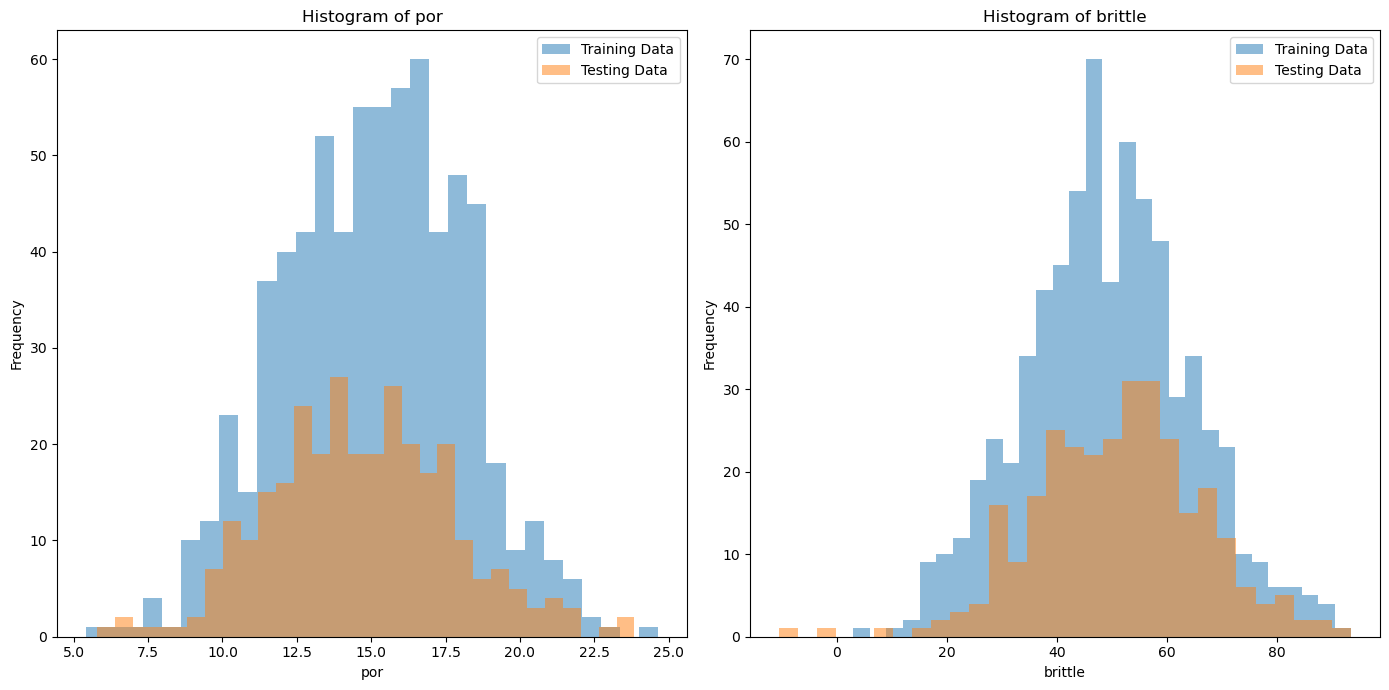

In [10]:
# Plotting histograms for the 'por' feature
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.hist(X_train[:, 0], bins=30, alpha=0.5, label='Training Data')
plt.hist(X_test[:, 0], bins=30, alpha=0.5, label='Testing Data')
plt.title('Histogram of por')
plt.xlabel('por')
plt.ylabel('Frequency')
plt.legend()

# Plotting histograms for the 'brittle' feature
plt.subplot(1, 2, 2)
plt.hist(X_train[:, 1], bins=30, alpha=0.5, label='Training Data')
plt.hist(X_test[:, 1], bins=30, alpha=0.5, label='Testing Data')
plt.title('Histogram of brittle')
plt.xlabel('brittle')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
# Define a pipeline with a StandardScaler and SVR
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# Define a wider parameter grid to explore, with the correct syntax for pipelines
param_grid = {
    'svr__C': np.logspace(-1, 3, 7),
    'svr__gamma': np.logspace(-1, 2, 6),
    'svr__epsilon': np.logspace(-1, 1, 5),
    'svr__kernel': ['sigmoid']  # 'poly', 'rbf', 'sigmoid' ------ # can be included if desired
}

# Initialize the grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Retrieve the best model
best_svr = grid_search.best_estimator_

# Evaluate the model on the test set
best_svr_mse = mean_squared_error(y_test, best_svr.predict(X_test))
best_svr_r2 = r2_score(y_test, best_svr.predict(X_test))

# Print the performance metrics
print("Improved SVR Model Performance:")
print(f"Mean Squared Error: {best_svr_mse}")
print(f"R-squared: {best_svr_r2}")
print(f"Best Parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 210 candidates, totalling 1050 fits
Improved SVR Model Performance:
Mean Squared Error: 956012.296502266
R-squared: 0.5200627224385946
Best Parameters: {'svr__C': 46.41588833612777, 'svr__epsilon': 10.0, 'svr__gamma': 0.3981071705534972, 'svr__kernel': 'sigmoid'}


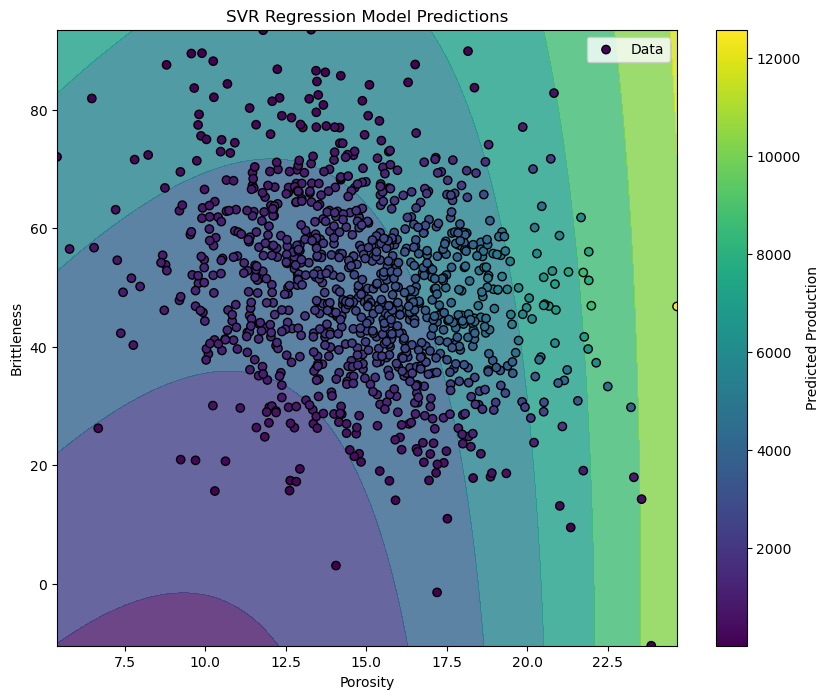

In [12]:
# Create a mesh grid of porosity and brittleness values for visualization
porosity_range = np.linspace(df['Por'].min(), df['Por'].max(), 100)
brittleness_range = np.linspace(df['Brittle'].min(), df['Brittle'].max(), 100)
porosity_grid, brittleness_grid = np.meshgrid(porosity_range, brittleness_range)

# Transform the grid points using the scaler
grid_standardized = scaler.transform(np.c_[porosity_grid.ravel(), brittleness_grid.ravel()])

# Predict production values across the grid using the best estimator
grid_predictions = grid_search.best_estimator_.predict(grid_standardized)
grid_predictions = grid_predictions.reshape(porosity_grid.shape)

# Plot the 2D pixel plot
plt.figure(figsize=(10, 8))
plt.contourf(porosity_grid, brittleness_grid, grid_predictions, cmap='viridis', alpha=0.8)

# Replace 'y_noisy_nonlinear' with the actual target values from data
plt.scatter(df['Por'], df['Brittle'], c=df['Production'], cmap='viridis', edgecolor='k', label='Data')
plt.title('SVR Regression Model Predictions')
plt.xlabel('Porosity')
plt.ylabel('Brittleness')
plt.colorbar(label='Predicted Production')
plt.legend()
plt.show()


### 2. Random Forest Regression Model


Random Forest Regression is a versatile ensemble learning method, utilizing multiple decision trees for robust regression predictions. It averages the results of individual trees to improve accuracy and control overfitting.

**Key Aspects of Random Forest Regression:**
- **Prediction:** Aggregates predictions from multiple decision trees to enhance accuracy and reduce variance.
- **Hyperparameters:** Includes `n_estimators` (number of trees), `max_depth` (depth of each tree), `min_samples_split`, and `min_samples_leaf`.
- **Usefulness:** Ideal for handling non-linear data with high dimensional spaces and provides a good balance between bias and variance.
- **Model Equation:** Based on the combination of predictions from numerous decision trees, each contributing to the final output.

**Workflow:**
1. Create multiple decision trees using random subsets of features and data points.
2. Each tree independently makes a prediction.
3. Aggregate these individual predictions for the final output.

The strength of Random Forest lies in its ability to capture complex relationships and provide high accuracy while being less prone to overfitting compared to individual decision trees.
 as needed

In [13]:
# Initializing the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Setting up a smaller hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100],  
    'max_depth': [None, 10],   
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Running grid search to tune the hyperparameters
grid_search_rf = GridSearchCV(rf, param_grid, cv=3, scoring='r2', verbose=1, n_jobs=-1)  
grid_search_rf.fit(X_train, y_train)

# Getting the best estimator
best_rf = grid_search_rf.best_estimator_

# Predicting on the testing set using the best estimator
y_pred2 = best_rf.predict(X_test)

# Evaluating the performance
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

# Results
best_params = grid_search_rf.best_params_
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Best Parameters:", best_params)



Fitting 3 folds for each of 16 candidates, totalling 48 fits
Mean Squared Error: 36797.94302068153
R^2 Score: 0.9815266972424724
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


### 3. CatBoost Regression Model

CatBoost (Categorical Boosting) Regression is an advanced implementation of gradient boosting, specialized in dealing with categorical data. It is known for its high performance, speed, and handling of large datasets.

**Key Aspects of CatBoost Regression:**
- **Prediction:** Utilizes gradient boosting on decision trees, focusing on converting categorical values into numerical ones efficiently.
- **Hyperparameters:** Includes `iterations`, `learning_rate`, `depth`, and `l2_leaf_reg`.
- **Usefulness:** Excels with datasets having numerous categorical features and is robust against overfitting, especially in complex scenarios.
- **Unique Features:** Offers built-in handling of categorical features and has a model interpretation tool, which is useful for understanding feature importance.

**Workflow:**
1. Preprocesses data, especially converting categorical variables without extensive manual encoding.
2. Builds multiple trees sequentially, each correcting the errors of the previous ones.
3. Combines the results of individual trees for the final prediction.

CatBoost stands out for its ease of use with minimal data preprocessing requirements and its ability to efficiently handle categorical data, making it a popular choice for diverse regression tasks.


In [14]:
# Initialize the CatBoostRegressor
catboost_model = CatBoostRegressor(loss_function='RMSE', verbose=False)

# Define the hyperparameter grid to search
param_grid = {
    'iterations': [500, 1000],
    'learning_rate': [0.01, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5]
}

# Initialize the grid search with minimal output
grid_search = GridSearchCV(
    estimator=catboost_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=0,  # Set to 0 for minimal output
    n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_parameters = grid_search.best_params_
print('Best Parameters:', best_parameters)

# Initialize a new CatBoostRegressor instance with the best parameters
best_catboost_model = CatBoostRegressor(**best_parameters, verbose=False)

# Fit the model with the best parameters
best_catboost_model.fit(X_train, y_train)

# Make predictions with the tuned model
y_pred3 = best_catboost_model.predict(X_test)

# Calculate and display performance metrics
mse = mean_squared_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)
print(f'Model Performance:\nMean Squared Error: {mse}\nR-squared: {r2}')


Best Parameters: {'depth': 4, 'iterations': 1000, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
Model Performance:
Mean Squared Error: 11322.202785510846
R-squared: 0.9943160279415262


### 4. Comparison

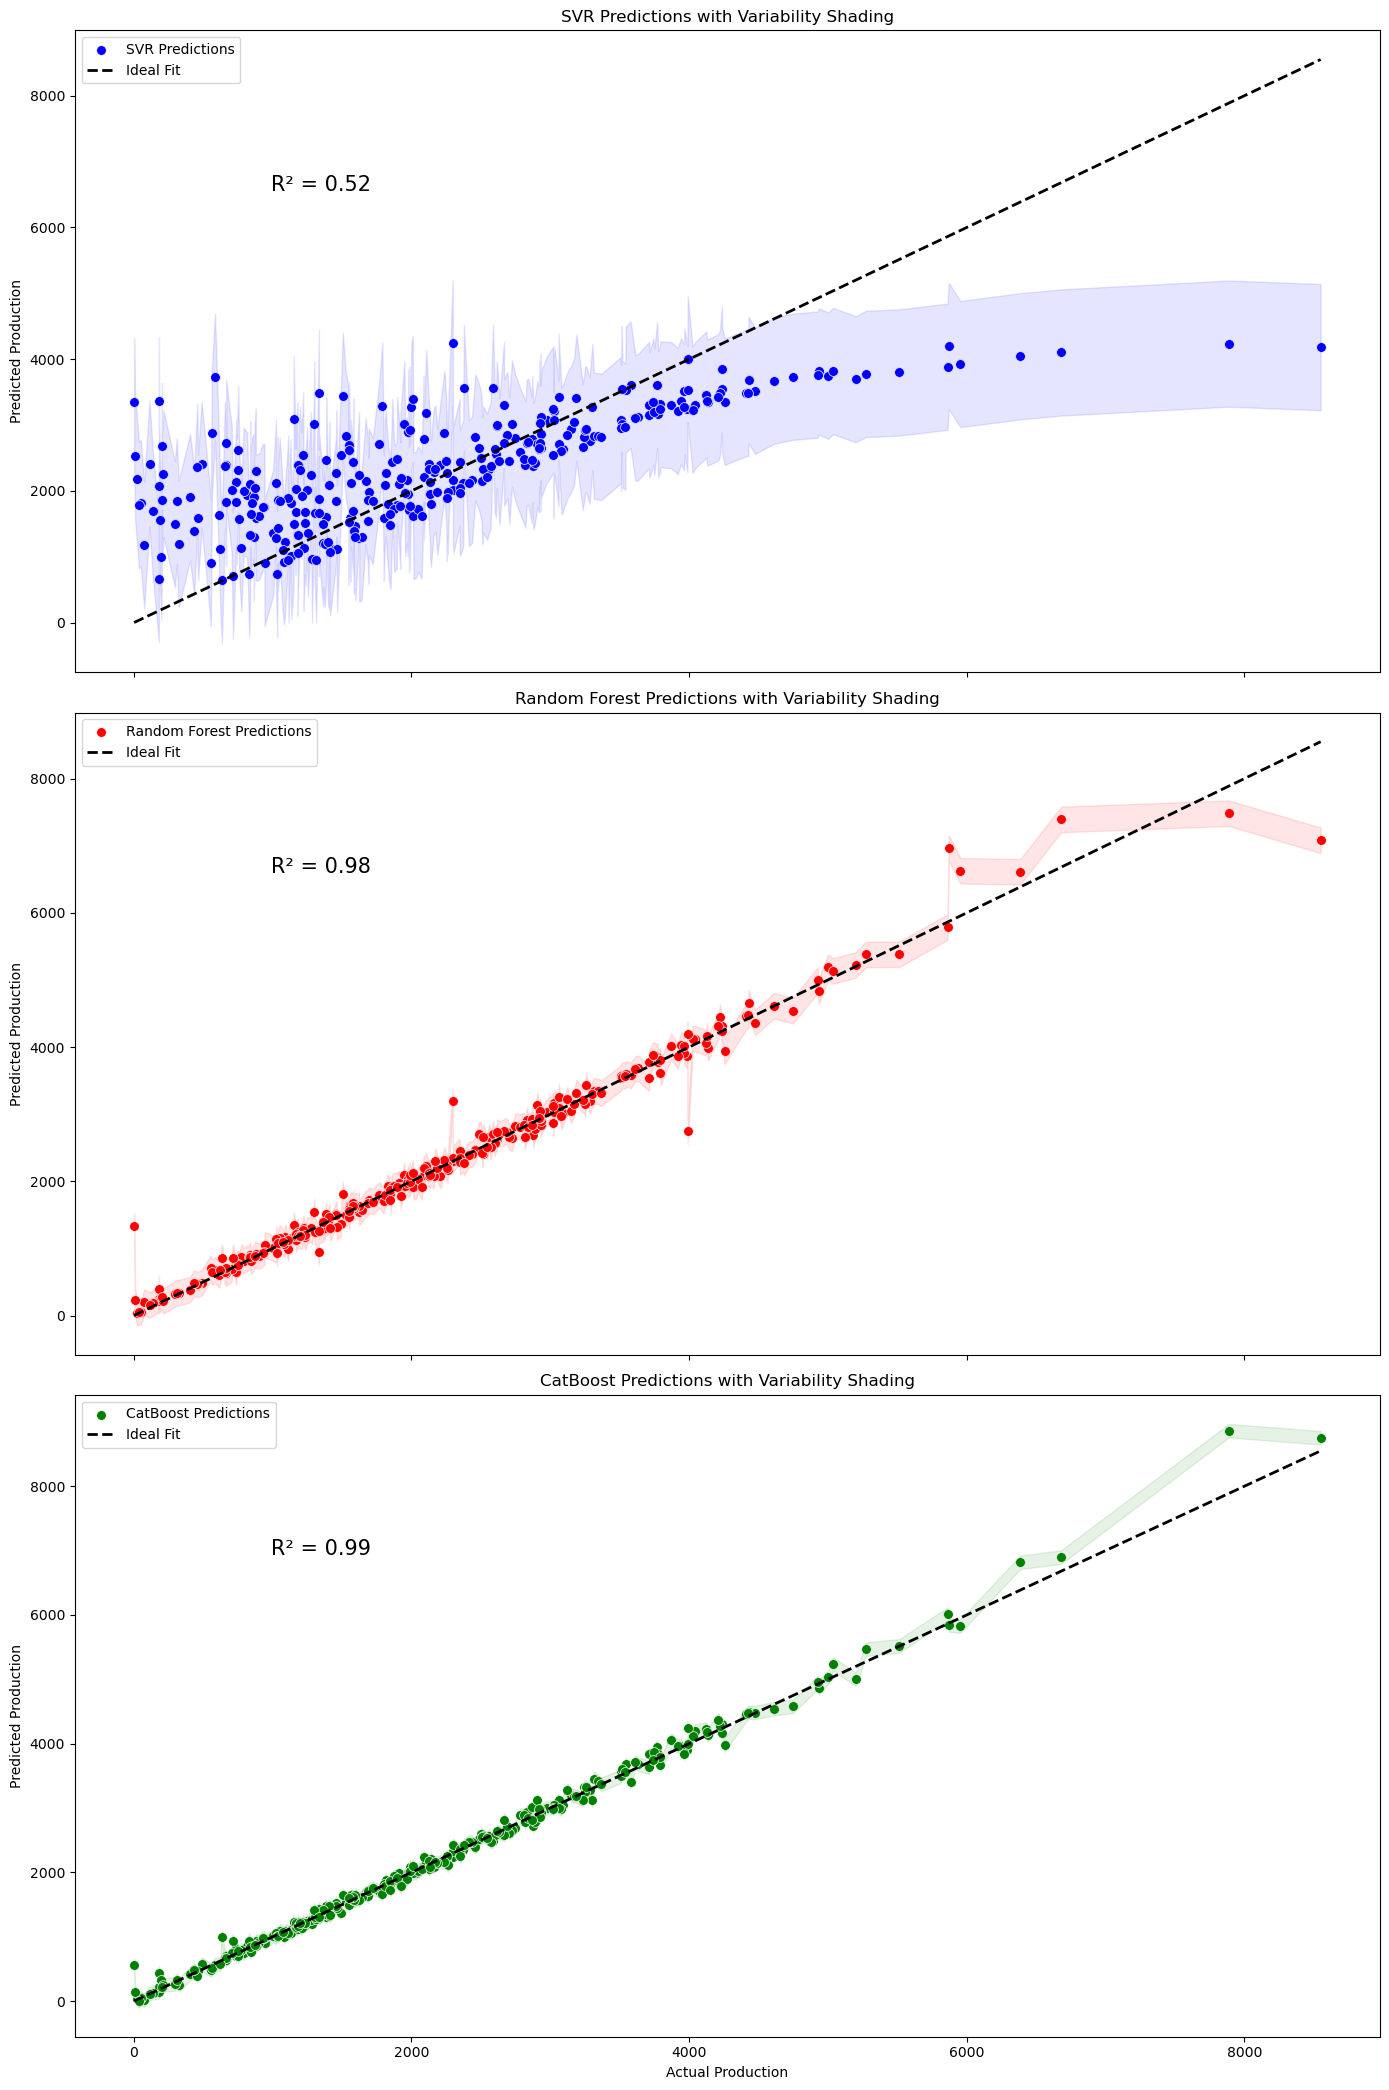

In [15]:
y_test_array = np.array(y_test)
y_pred = best_svr.predict(X_test)  
y_pred2 = best_rf.predict(X_test)

# Calculate the standard deviation of the residuals for both models
svr_residuals = y_test_array - y_pred
rf_residuals = y_test_array - y_pred2
cb_residuals = y_test_array - y_pred3
cb_std = np.std(cb_residuals)
svr_std = np.std(svr_residuals)
rf_std = np.std(rf_residuals)


# Get sorted order for actual values
sorted_indices = np.argsort(y_test_array)

# Calculate R-squared values
r2_svr = r2_score(y_test_array, y_pred)
r2_rf = r2_score(y_test_array, y_pred2)
r2_cb = r2_score(y_test_array, y_pred3)

# Create a figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 21), sharex=True)

# SVR Predictions with shaded region and R-squared
sns.scatterplot(ax=axes[0], x=y_test_array, y=y_pred, s=50, color='blue', label='SVR Predictions')
axes[0].fill_between(y_test_array[sorted_indices], 
                     (y_pred - svr_std)[sorted_indices], 
                     (y_pred + svr_std)[sorted_indices], 
                     color='blue', alpha=0.1)
axes[0].plot(y_test_array[sorted_indices], y_test_array[sorted_indices], 'k--', lw=2, label='Ideal Fit')
axes[0].set_title('SVR Predictions with Variability Shading')
axes[0].annotate(f'R² = {r2_svr:.2f}', xy=(0.15, 0.75), xycoords='axes fraction', fontsize=15)

# Random Forest Predictions with shaded region and R-squared
sns.scatterplot(ax=axes[1], x=y_test_array, y=y_pred2, s=50, color='red', label='Random Forest Predictions')
axes[1].fill_between(y_test_array[sorted_indices], 
                     (y_pred2 - rf_std)[sorted_indices], 
                     (y_pred2 + rf_std)[sorted_indices], 
                     color='red', alpha=0.1)
axes[1].plot(y_test_array[sorted_indices], y_test_array[sorted_indices], 'k--', lw=2, label='Ideal Fit')
axes[1].set_title('Random Forest Predictions with Variability Shading')
axes[1].annotate(f'R² = {r2_rf:.2f}', xy=(0.15, 0.75), xycoords='axes fraction', fontsize=15)

# CatBoost Predictions with shaded region and R-squared
sns.scatterplot(ax=axes[2], x=y_test_array, y=y_pred3, s=50, color='green', label='CatBoost Predictions')
axes[2].fill_between(y_test_array[sorted_indices], 
                     (y_pred3 - cb_std)[sorted_indices], 
                     (y_pred3 + cb_std)[sorted_indices], 
                     color='green', alpha=0.1)
axes[2].plot(y_test_array[sorted_indices], y_test_array[sorted_indices], 'k--', lw=2, label='Ideal Fit')
axes[2].set_title('CatBoost Predictions with Variability Shading')
axes[2].annotate(f'R² = {r2_cb:.2f}', xy=(0.15, 0.75), xycoords='axes fraction', fontsize=15)

# Labeling
for ax in axes:
    ax.set_xlabel('Actual Production')
    ax.set_ylabel('Predicted Production')
    ax.legend()

# Adjust the layout
plt.tight_layout()
plt.show()


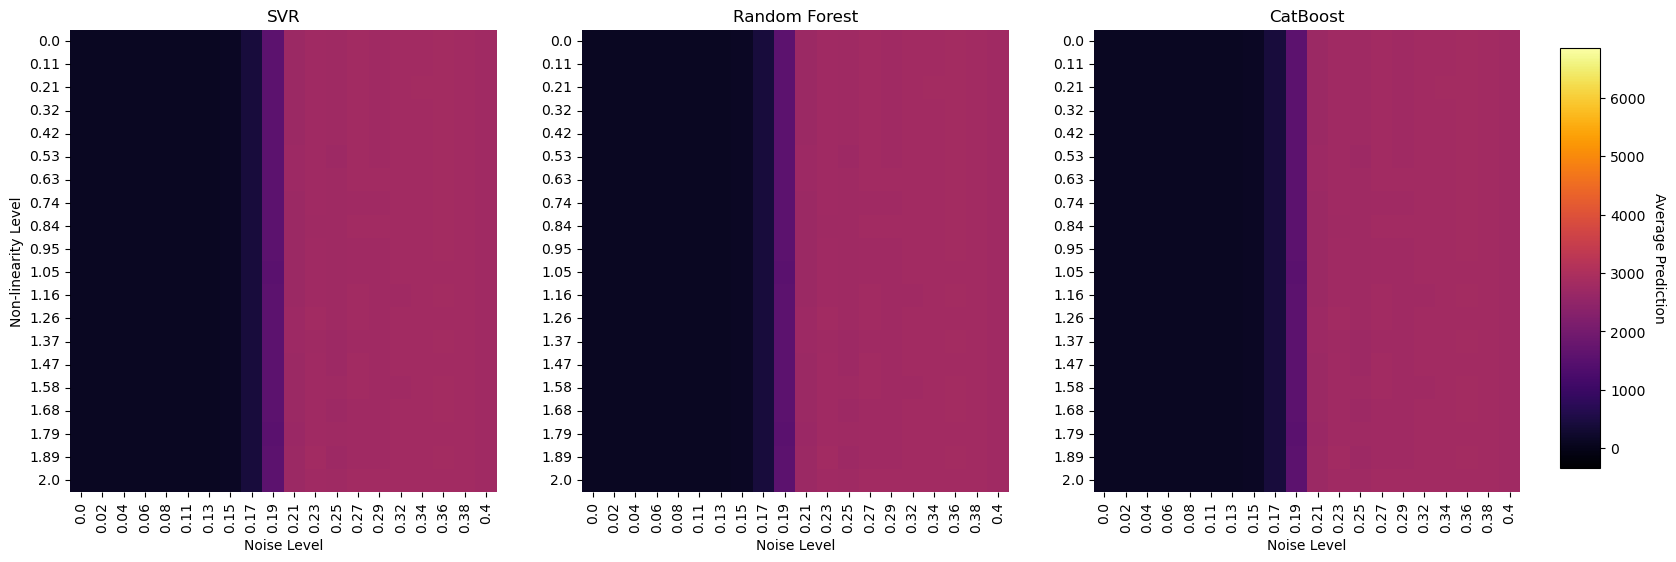

In [16]:
# Define the range and granularity of non-linearity and noise levels
nonlinearity_levels = np.linspace(0, 2, 20)  
noise_levels = np.linspace(0, 0.4, 20)     

# Create meshgrids for non-linearity and noise levels
nonlinearity_grid, noise_grid = np.meshgrid(nonlinearity_levels, noise_levels)


models = [best_svr, best_rf, best_catboost_model]
names = ['SVR', 'Random Forest', 'CatBoost']

# Initialize the imputer to replace NaN values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Define the figure and the axes for the subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6), gridspec_kw={'width_ratios': [1, 1, 1]})

# Calculate the min and max of all predictions for consistent color scaling
min_val, max_val = float('inf'), float('-inf')

# Calculate predictions and update min/max values
for model in models:
    predictions_matrix = np.zeros_like(nonlinearity_grid)
    for i in range(nonlinearity_grid.shape[0]):
        for j in range(nonlinearity_grid.shape[1]):
            # Modify data and impute NaN values
            X_test_modified = modify_data(X_test, nonlinearity_grid[i, j], noise_grid[i, j])
            X_test_modified = imputer.fit_transform(X_test_modified)
            predictions_matrix[i, j] = np.mean(model.predict(X_test_modified))
    # Update the min and max values based on the predictions
    min_val = min(min_val, predictions_matrix.min())
    max_val = max(max_val, predictions_matrix.max())

# Plotting the heatmap for each model
for idx, (model, name) in enumerate(zip(models, names)):
    sns.heatmap(predictions_matrix, xticklabels=np.round(noise_levels, 2), 
                yticklabels=np.round(nonlinearity_levels, 2), cmap='inferno', 
                ax=axes[idx], cbar=False, vmin=min_val, vmax=max_val)
    axes[idx].set_title(name)
    axes[idx].set_xlabel('Noise Level')
    axes[idx].set_ylabel('Non-linearity Level' if idx == 0 else '')

# Add a color bar to the right of the subplots
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])
sm = plt.cm.ScalarMappable(cmap='inferno', norm=plt.Normalize(vmin=min_val, vmax=max_val))
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('Average Prediction', rotation=270, labelpad=15)
plt.show()

#### Comments

- **SVR (Support Vector Regression):**
  - Captures non-linear patterns using kernel functions.
  - Allows fine-tuning through hyperparameters like C, kernel, and gamma.
  - Balances margin optimization and error tolerance.
  
  

- **Random Forest Regression:**
  - Utilizes ensemble learning to improve prediction stability.
  - Offers hyperparameter tuning for tree-specific parameters.
  - Demonstrates a balance between bias and variance through bagging.



- **CatBoost Regression:**
  - Excels in handling categorical features with minimal preprocessing.
  - Provides extensive hyperparameter tuning options for model optimization.
  - Achieves high prediction accuracy, robust to noise and data complexity.


I hope this was helpful,

*Nadia Mouedden*

___________________

#### Work Supervised by:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
